<a href="https://colab.research.google.com/github/travislatchman/Neuroimage-Registration-and-Synthesis/blob/main/Project2_DTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nilearn
#!pip install nibabel
!pip install nibabel==3.2.1 nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# !pip uninstall nibabel nilearn
# !pip install nibabel nilearn


In [3]:
# !pip uninstall nibabel nilearn
# !pip install nibabel==3.2.1 nilearn


In [4]:
import os
import nibabel as nib
from nilearn.masking import compute_brain_mask

In [5]:
# # read in all files from each subfolder (for 200 patients)

# data_folder = 'MedIA_Project2'
# number_of_patients = 200
# patients_data = {}

# for i in range(1, number_of_patients + 1):
#     patient_id = f'{i:03}'
#     file_names = [
#         'ADC_deformed.nii.gz',
#         'T1w_1mm.nii.gz',
#         'FA_deformed.nii.gz',
#         'T2w_1mm_noalign.nii.gz'
#     ]
#     patient_folder = os.path.join(data_folder, patient_id)
#     patient_files = {}

#     for file_name in file_names:
#         file_path = os.path.join(patient_folder, file_name)
#         if os.path.exists(file_path):
#             patient_files[file_name] = nib.load(file_path)
#         else:
#             print(f"File not found: {file_path}")
    
#     patients_data[patient_id] = patient_files


In [6]:
# def load_patient_data(patient_id, data_folder='MedIA_Project2'):
#     file_names = [
#         'ADC_deformed.nii.gz',
#         'T1w_1mm.nii.gz',
#         'FA_deformed.nii.gz',
#         'T2w_1mm_noalign.nii.gz'
#     ]
#     patient_folder = os.path.join(data_folder, patient_id)
#     patient_files = {}

#     for file_name in file_names:
#         file_path = os.path.join(patient_folder, file_name)
#         if os.path.exists(file_path):
#             patient_files[file_name] = nib.load(file_path)
#         else:
#             print(f"File not found: {file_path}")
    
#     return patient_files

# # Example usage:
# patient_id = '001'
# patient_data = load_patient_data(patient_id)


In [7]:
def load_patient_data(patient_id):
    file_names = [
        'ADC_deformed.nii.gz',
        'T1w_1mm.nii.gz',
        'FA_deformed.nii.gz',
        'T2w_1mm_noalign.nii.gz'
    ]
    #patient_folder = patient_id
    patient_files = {}

    for file_name in file_names:
        file_path = os.path.join(patient_id, file_name)
        if os.path.exists(file_path):
            patient_files[file_name] = nib.load(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return patient_files




In [8]:
# Example patient one:
patient_id = '001'
patient_data = load_patient_data(patient_id)
print(patient_data) # we will be handling and working with patient files in a dictionary

{'ADC_deformed.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f28098c1370>, 'T1w_1mm.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f28098c1130>, 'FA_deformed.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f28098c15e0>, 'T2w_1mm_noalign.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f28098c1c10>}


Displaying ADC_deformed.nii.gz


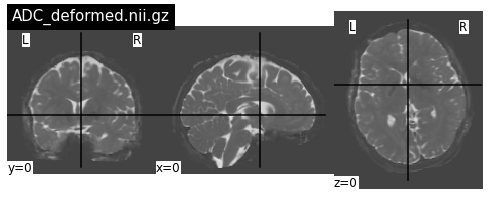

Displaying T1w_1mm.nii.gz


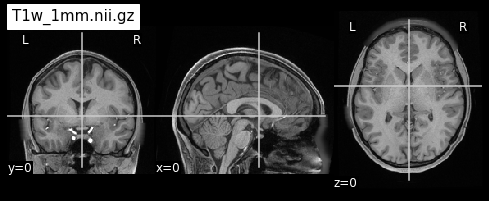

Displaying FA_deformed.nii.gz


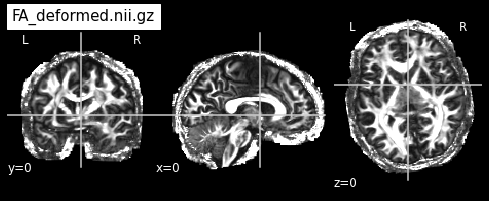

Displaying T2w_1mm_noalign.nii.gz


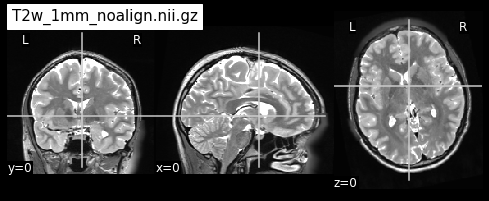

In [36]:
from nilearn import plotting

# Plot the patient images
for file_name, img in patient_data.items():
    print(f"Displaying {file_name}")
    plotting.plot_anat(img, cut_coords=(0, 0, 0), title=file_name, dim=-1)
    plotting.show()

If the patient folders are within another folder, modify the file_path line to include the parent folder

In [10]:
#file_path = os.path.join(parent_folder, patient_id, file_name)


# Skull Strip FSL

produce images locally on terminal using FSL (bash script for images in a patient's folder) 




input_dir=001
output_dir=001_stripped

mkdir -p ${output_dir}


for input_file in ${input_dir}/*{ADC,T2w,T1w,FA}*.nii.gz
do

  output_file=${output_dir}/stripped_$(basename ${input_file}).nii.gz

  bet ${input_file} ${output_file} -m
done


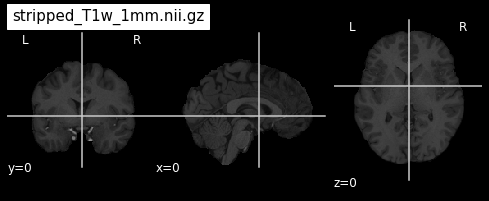

In [11]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
t1w_img = nib.load("stripped_T1w_1mm.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(t1w_img, cut_coords=(0, 0, 0), title="stripped_T1w_1mm.nii.gz")

# Show the plot
plt.show()


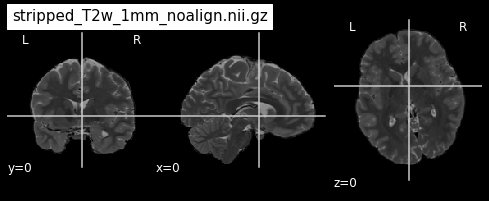

In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
t2w_img = nib.load("stripped_T2w_1mm_noalign.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(t2w_img, cut_coords=(0, 0, 0), title="stripped_T2w_1mm_noalign.nii.gz")

# Show the plot
plt.show()


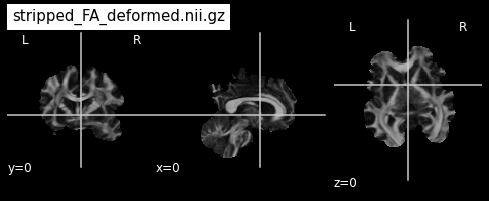

In [13]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
fa_img = nib.load("stripped_FA_deformed.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(fa_img, cut_coords=(0, 0, 0), title="stripped_FA_deformed.nii.gz")

# Show the plot
plt.show()


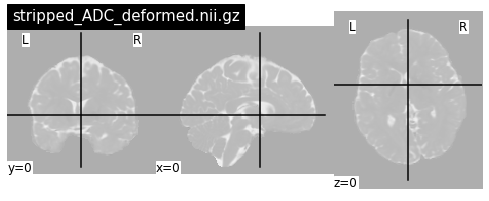

In [14]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
adc_img = nib.load("stripped_ADC_deformed.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(adc_img, cut_coords=(0, 0, 0), title="stripped_ADC_deformed.nii.gz")

# Show the plot
plt.show()


In [15]:
# !curl -sSL https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py -o fslinstaller.py
# !python fslinstaller.py -d /content/fsl -V latest


# Skull Strip

In [16]:
# import os
# import nibabel as nib
# from nilearn import plotting

In [17]:
# def skull_strip(input_nii, output_nii_path):
#     brain_mask = compute_brain_mask(input_nii)
#     brain_data = input_nii.get_fdata() * brain_mask.get_fdata()
#     brain_nii = nib.Nifti1Image(brain_data, input_nii.affine, input_nii.header)
#     nib.save(brain_nii, output_nii_path)
#     return brain_nii

In [18]:
# # Load and skull-strip the patient images
# patient_id = '001'
# patient_data = load_patient_data(patient_id)
# skull_stripped_data = {}

In [19]:
# for file_name, nii_file in patient_data.items():
#     output_file_name = f"skull_stripped_{file_name}"
#     output_file_path = os.path.join(patient_id, output_file_name)
#     skull_stripped_nii = skull_strip(nii_file, output_file_path)
#     skull_stripped_data[output_file_name] = skull_stripped_nii
#     print(f"Skull stripped {file_name} saved to {output_file_path}")

# # Plot the skull-stripped patient images
# for file_name, img in skull_stripped_data.items():
#     print(f"Displaying {file_name}")
#     plotting.plot_anat(img, title=file_name, dim=-1)
#     plotting.show()


# Register Images

In [20]:
!pip install antspyx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import ants

In [22]:
# def register_image_to_reference(input_image, reference_image, output_file_path):
#     fixed_image = ants.image_read(reference_image)
#     moving_image = ants.image_read(input_image)

#     # Perform registration
#     registration = ants.registration(fixed=fixed_image, moving=moving_image, type_of_transform='Affine')
#     registered_image = registration['warpedmovout']

#     # Save the registered image to the output file path
#     ants.image_write(registered_image, output_file_path)

#     return registered_image

In [23]:
# # Set the reference image to T1w
# reference_image_file = 'skull_stripped_T1w_1mm.nii.gz'
# reference_image_path = os.path.join(patient_id, reference_image_file)


In [24]:
# # Register other images to the reference image
# registered_data = {}
# for file_name, nii_file in skull_stripped_data.items():
#     if file_name != reference_image_file:
#         output_file_name = f"registered_{file_name}"
#         output_file_path = os.path.join(patient_id, output_file_name)
#         input_image_path = os.path.join(patient_id, file_name)
#         registered_image = register_image_to_reference(input_image_path, reference_image_path, output_file_path)
#         registered_data[output_file_name] = registered_image
#         print(f"Registered {file_name} saved to {output_file_path}")

In [25]:
# from nilearn import plotting

# # Plot the registered patient images
# for file_name, img in registered_data.items():
#     ants_nib = ants.to_nibabel(img)
#     print(f"Displaying {file_name}")
#     plotting.plot_anat(ants_nib, title=file_name, dim=-1)
#     plotting.show()


In [27]:


# Load the images



t1w_path = 'stripped_T1w_1mm.nii.gz'
t2w_path = 'stripped_T2w_1mm_noalign.nii.gz'
fa_path = 'stripped_FA_deformed.nii.gz'
adc_path = 'stripped_ADC_deformed.nii.gz'

t1w_img = ants.image_read(t1w_path)
t2w_img = ants.image_read(t2w_path)
fa_img = ants.image_read(fa_path)
adc_img = ants.image_read(adc_path)

# Perform rigid registration of T2w, FA, and ADC to T1w
t2w_rigid = ants.registration(fixed=t1w_img, moving=t2w_img, type_of_transform='Rigid')
fa_rigid = ants.registration(fixed=t1w_img, moving=fa_img, type_of_transform='Rigid')
adc_rigid = ants.registration(fixed=t1w_img, moving=adc_img, type_of_transform='Rigid')

t2w_rigid_img = t2w_rigid['warpedmovout']
fa_rigid_img = fa_rigid['warpedmovout']
adc_rigid_img = adc_rigid['warpedmovout']

# Perform non-rigid registration of FA and ADC to T1w
fa_nrigid = ants.registration(fixed=t1w_img, moving=fa_rigid_img, type_of_transform='SyN')
adc_nrigid = ants.registration(fixed=t1w_img, moving=adc_rigid_img, type_of_transform='SyN')

fa_nrigid_img = fa_nrigid['warpedmovout']
adc_nrigid_img = adc_nrigid['warpedmovout']

# Save the registered images
t2w_reg_path = 'T2w_registered.nii.gz'
fa_reg_path = 'FA_registered.nii.gz'
adc_reg_path = 'ADC_registered.nii.gz'

ants.image_write(t2w_rigid_img, t2w_reg_path)
ants.image_write(fa_nrigid_img, fa_reg_path)
ants.image_write(adc_nrigid_img, adc_reg_path)


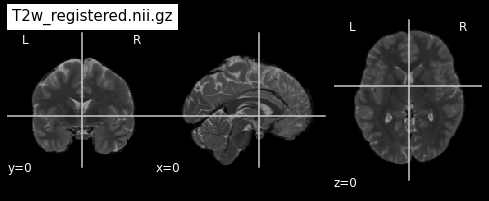

In [32]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
t2_reg = nib.load("T2w_registered.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(t2_reg, cut_coords=(0, 0, 0), title="T2w_registered.nii.gz")

# Show the plot
plt.show()


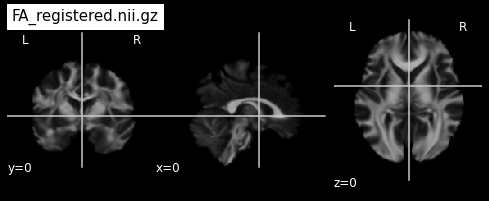

In [34]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
fa_reg = nib.load("FA_registered.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(fa_reg, cut_coords=(0, 0, 0), title="FA_registered.nii.gz")

# Show the plot
plt.show()


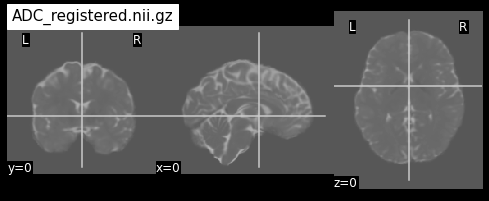

In [35]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Load the image data
adc_reg = nib.load("ADC_registered.nii.gz")

# Plot the image using nilearn's plotting function
plotting.plot_anat(adc_reg, cut_coords=(0, 0, 0), title="ADC_registered.nii.gz")

# Show the plot
plt.show()
